# Lab 4: Sequential Data

This lab is based on an assignment developed by Prof. Lisa Zhang.

In this assignment, we will build a recurrent neural network to classify a SMS text message
as "spam" or "not spam". In the process, you will
    
1. Clean and process text data for machine learning.
2. Understand and implement a character-level recurrent neural network.
3. Use torchtext to build recurrent neural network models.
4. Understand batching for a recurrent neural network, and use torchtext to implement RNN batching.
5. Understand how transfer learning can be applied to NLP projects.

### What to submit

Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1u674ix6TzYT41W01pcUlUVu6mMUncHCi?usp=sharing

# PART A - Spam Detection [30 pt]

In this part we will construct a LSTM model for identifying spam from non spam messages.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(100)

## Part 1. Data Cleaning [10 pt]

We will be using the "SMS Spam Collection Data Set" available at http://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

There is a link to download the "Data Folder" at the very top of the webpage. Download the zip file, unzip it, and upload the file `SMSSpamCollection` to Colab.    

### Part (a) [1 pt]

Open up the file in Python, and print out one example of a spam SMS, and one example of a non-spam SMS.

What is the label value for a spam message, and what is the label value for a non-spam message?

In [ ]:
for line in open('SMSSpamCollection'):
  if line[0] == 'h':
    print(line)
    break

for line in open('SMSSpamCollection'):
  if line[0] == "s":
    print(line)
    break

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's



The label value for a spam message is `spam`, the label value for a non-spam message is `ham`.

### Part (b) [1 pt]

How many spam messages are there in the data set?
How many non-spam messages are there in the data set?


In [ ]:
import pandas as pd
import csv
messages = pd.read_csv('SMSSpamCollection', sep='\t', quoting=csv.QUOTE_NONE,
                        names=["label", "message"])

In [ ]:
spam_meg = messages[messages['label']=='spam']
ham_meg = messages[messages['label']=='ham']

In [ ]:
print(spam_meg.shape[0])
print(ham_meg.shape[0])

747
4827


There are 4827 non-spam messages in the dataset, and 747 spam messages in the dataset.

### Part (c) [2 pt]

We will be using the package `torchtext` to load, process, and batch the data.
A tutorial to torchtext is available below. This tutorial uses the same
Sentiment140 data set that we explored during lecture.

https://medium.com/@sonicboom8/sentiment-analysis-torchtext-55fb57b1fab8

Unlike what we did during lecture, we will be building a **character level RNN**.
That is, we will treat each **character** as a token in our sequence,
rather than each **word**.

Identify two advantage and two disadvantage of modelling SMS text
messages as a sequence of characters rather than a sequence of words.


*   Advantage:
1. The discrete space is smaller when working with character-level generative models. There are about 97 English-language characters in common usage if we include all punctuation marks. By contrast, there are thousands of words. In this case, storing the word embeddings will require a lot of memory.

2. The likelihood of seeing an unknown word is much higher than seeing an unknown character, so less tokens will need to be used when using a sequence of characters. This allows the model to receive a better representation of the actual message as an input and help the model generalize to new messages which may contain words not part of the model's vocabulary. This advantages helps a lot when dealing the spam message problem.

*   Disadvantage
1. Using a sequence of character is less effective at recognizing the meaning of longer sequences of words. The meaning in language is carried by words, char-based RNN model need to "remember" the relationships between characters, in contrast, in a word-based model, the model only needs to "remember" the relationships between words.
2. In a sentence, the number of character is larger than the number of word, so inputs to the char-based RNN model will be much longer than in a word-based RNN. This would require more computations to train the network.



### Part (d) [1 pt]

We will be loading our data set using `torchtext.data.TabularDataset`. The
constructor will read directly from the `SMSSpamCollection` file.

For the data file to be read successfuly, we
need to specify the **fields** (columns) in the file.
In our case, the dataset has two fields:

- a text field containing the sms messages,
- a label field which will be converted into a binary label.

Split the dataset into `train`, `valid`, and `test`. Use a 60-20-20 split.
You may find this torchtext API page helpful:
https://torchtext.readthedocs.io/en/latest/data.html#dataset

Hint: There is a `Dataset` method that can perform the random split for you.

In [ ]:
!pip install -U torch==1.8.0+cu111 torchtext==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html
# Reload environment
exit()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 1.8 MB/s eta 0:10:37tcmalloc: large alloc 1147494400 bytes == 0x39d96000 @  0x7f2f0ab9c615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |█████████████████               | 1055.7 MB 1.2 MB/s eta 0:12:40tcmalloc: large alloc 1434370048 bytes == 0x7e3ec000 @  0x7f2f0ab9c615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |█████

In [ ]:
import torchtext

text_field = torchtext.legacy.data.Field(sequential=True,      # text sequence
                                  tokenize=lambda x: x, # because are building a character-RNN
                                  include_lengths=True, # to track the length of sequences, for batching
                                  batch_first=True,
                                  use_vocab=True)       # to turn each character into an integer index
label_field = torchtext.legacy.data.Field(sequential=False,    # not a sequence
                                   use_vocab=False,     # don't need to track vocabulary
                                   is_target=True,
                                   batch_first=True,
                                   preprocessing=lambda x: int(x == 'spam')) # convert text to 0 and 1

fields = [('label', label_field), ('sms', text_field)]
dataset = torchtext.legacy.data.TabularDataset("SMSSpamCollection", # name of the file
                                        "tsv",               # fields are separated by a tab
                                        fields)

#dataset[0].sms
#dataset[0].label
train, valid, test = dataset.split(split_ratio=[0.6,0.2,0.2])

In [ ]:
print(len(train))
print(len(valid))
print(len(test))

3343
1115
1114


### Part (e) [2 pt]

You saw in part (b) that there are many more non-spam messages than spam messages.
This **imbalance** in our training data will be problematic for training.
We can fix this disparity by duplicating spam messages in the training set,
so that the training set is roughly **balanced**.

Explain why having a balanced training set is helpful for training our neural network.

Note: if you are not sure, try removing the below code and train your mode.

Having a balanced training set will let our model have better performance.

If the dataset is unbalanced, for example, we have non-spam with 90 observations and spam with 10 observations. If we predict the entire data set non-spam, we will achieve an accuracy of 90%, which seems not bad for a classification model. But this model is very poor, since the unbalanced data will encourage the model bias towards false negative error.

Having a balanced training dataset, the model will learn how to classify spam message as well as how to classify non-spam message, which will improve the performance of our model.


In [ ]:
# save the original training examples
old_train_examples = train.examples
# get all the spam messages in `train`
train_spam = []
for item in train.examples:
    if item.label == 1:
        train_spam.append(item)
# duplicate each spam message 6 more times
train.examples = old_train_examples + train_spam * 6

### Part (f) [1 pt]

We need to build the vocabulary on the training data by running the below code.
This finds all the possible character tokens in the training set.

Explain what the variables `text_field.vocab.stoi` and `text_field.vocab.itos` represent.

In [ ]:
text_field.build_vocab(train)
#text_field.vocab.stoi
#text_field.vocab.itos

`text_field.vocab.stoi` represents a dictionary that mapping each character in the training dataset from token string to indices (numerical classifier).

`text_field.vocab.itos` represents a list of token strings indexed by their numerical identifiers.

### Part (g) [1 pt]

The tokens `<unk>` and `<pad>` were not in our SMS text messages.
What do these two values represent?

The token `<unk>` represents unknown token.
The token `<pad>` represents the token used to increase the size of SMS messages, so that all SMS messages in a batch have the same length (i.e. the token for padding).

### Part (h) [1 pt]

Since text sequences are of variable length, `torchtext` provides a `BucketIterator` data loader,
which batches similar length sequences together. The iterator also provides functionalities to
pad sequences automatically.

Take a look at 10 batches in `train_iter`. What is the maximum length of the
input sequence in each batch? How many `<pad>` tokens are used in each of the 10
batches?

In [ ]:
train_iter = torchtext.legacy.data.BucketIterator(train,
                                           batch_size=32,
                                           sort_key=lambda x: len(x.sms), # to minimize padding
                                           sort_within_batch=True,        # sort within each batch
                                           repeat=False)                  # repeat the iterator for many epochs

In [ ]:
valid_iter = torchtext.legacy.data.BucketIterator(valid,
                                           batch_size=32,
                                           sort_key=lambda x: len(x.sms), # to minimize padding
                                           sort_within_batch=True,        # sort within each batch
                                           repeat=False)                  # repeat the iterator for many epochs

test_iter = torchtext.legacy.data.BucketIterator(test,
                                           batch_size=32,
                                           sort_key=lambda x: len(x.sms), # to minimize padding
                                           sort_within_batch=True,        # sort within each batch
                                           repeat=False)                  # repeat the iterator for many epochslegacy

In [ ]:
ind = 0
max_length = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
count = [0, 0, 0, 0, 0, 0, 0, 0, 0 ,0]


for batch in train_iter:
  if ind < 10:
    for sms in batch.sms[0]:
      if len(sms) > max_length[ind]:
        max_length[ind] = len(sms)
      for token in sms:
        if token == text_field.vocab.stoi["<pad>"]:
          count[ind] += 1
    ind += 1

In [ ]:
print(max_length)
print(count)

[143, 158, 147, 125, 45, 158, 118, 790, 143, 43]
[0, 0, 4, 22, 27, 1, 32, 14369, 41, 12]


For each batch, the maximum length of the input sequence is `[143, 158, 147, 125, 45, 158, 118, 790, 143, 43]`.

For each of the 10 batches, the number of `<pad>` is `[0, 0, 4, 22, 27, 1, 32, 14369, 41, 12].`
`

## Part 2. Model Building [5 pt]

Build a recurrent neural network model, using an architecture of your choosing.
Use the one-hot embedding of each character as input to your recurrent network.
Use one or more fully-connected layers to make the prediction based on your
recurrent network output.

Instead of using the RNN output value for the final token, another often used
strategy is to max-pool over the entire output array. That is, instead of calling
something like:

```
out, _ = self.rnn(x)
self.fc(out[:, -1, :])
```

where `self.rnn` is an `nn.RNN`, `nn.GRU`, or `nn.LSTM` module, and `self.fc` is a
fully-connected
layer, we use:

```
out, _ = self.rnn(x)
self.fc(torch.max(out, dim=1)[0])
```

This works reasonably in practice. An even better alternative is to concatenate the
max-pooling and average-pooling of the RNN outputs:

```
out, _ = self.rnn(x)
out = torch.cat([torch.max(out, dim=1)[0],
                 torch.mean(out, dim=1)], dim=1)
self.fc(out)
```

We encourage you to try out all these options. The way you pool the RNN outputs
is one of the "hyperparameters" that you can choose to tune later on.

In [ ]:
# You might find this code helpful for obtaining
# PyTorch one-hot vectors.

ident = torch.eye(10)
print(ident[0]) # one-hot vector
print(ident[1]) # one-hot vector
x = torch.tensor([[1, 2], [3, 4]])
print(ident[x]) # one-hot vectors

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]])


In [ ]:
class RNN_model(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_layers):

        super(RNN_model, self).__init__()

        self.ident = torch.eye(input_size)

        self.hidden_size = hidden_size

        self.rnn = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)

        self.classifier = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        one_hot = []
        for sms in x:
          one_hot.append(self.ident[sms])

        inp_x = torch.stack(one_hot)

        # Forward propagate the RNN
        output, _ = self.rnn(inp_x)
        out =  torch.max(output, dim=1)[0]    # max pooling the GRU output
        out = self.classifier(out)            # predict SPAM/HAM
        return out

## Part 3. Training [8 pt]

### Part (a) [2 pt]

Complete the `get_accuracy` function, which will compute the
accuracy (rate) of your model across a dataset (e.g. validation set).
You may modify `torchtext.data.BucketIterator` to make your computation
faster.

In [ ]:
def get_accuracy(model, data):
    """ Compute the accuracy of the `model` across a dataset `data`

    Example usage:

    >>> model = MyRNN() # to be defined
    >>> get_accuracy(model, valid) # the variable `valid` is from above
    """
    correct, total = 0, 0
    for sms, labels in data:
        output = model(sms[0])
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += labels.shape[0]
    return correct / total

### Part (b) [2 pt]

Train your model. Plot the training curve of your final model.
Your training curve should have the training/validation loss and
accuracy plotted periodically.

Note: Not all of your batches will have the same batch size.
In particular, if your training set does not divide evenly by
your batch size, there will be a batch that is smaller than
the rest.

In [ ]:
def train_rnn_network(model, train, valid, num_epochs=5, learning_rate=1e-4):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    it = 0
    losses, train_acc, valid_acc = [], [], []
    epochs = []
    for epoch in range(num_epochs):
        avg_loss = 0
        for sms, labels in train:
            optimizer.zero_grad()
            pred = model(sms[0])
            loss = criterion(pred, labels)
            loss.backward()
            optimizer.step()

        losses.append(float(loss))
        epochs.append(epoch+1)
        train_acc.append(get_accuracy(model, train))
        valid_acc.append(get_accuracy(model, valid))
        print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f" % (
              epoch+1, loss, train_acc[-1], valid_acc[-1]))
    # plotting
    plt.title("Training Curve")
    plt.plot(losses, label="Train")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

Epoch 1; Loss 0.639159; Train Acc 0.526980; Val Acc 0.126457
Epoch 2; Loss 0.723394; Train Acc 0.528621; Val Acc 0.127354
Epoch 3; Loss 0.099297; Train Acc 0.930294; Val Acc 0.960538
Epoch 4; Loss 0.217016; Train Acc 0.924717; Val Acc 0.964126
Epoch 5; Loss 0.267309; Train Acc 0.899951; Val Acc 0.967713


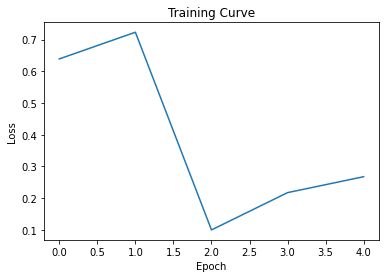

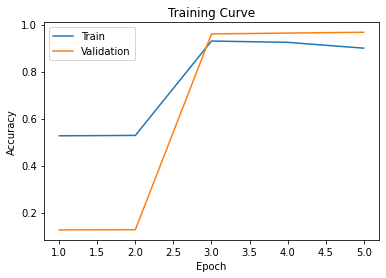

In [ ]:
RNN_1 = RNN_model(len(text_field.vocab.itos), len(text_field.vocab.itos),  num_classes = 2, num_layers = 1)
train_rnn_network(RNN_1, train_iter, valid_iter, num_epochs=5, learning_rate=1e-4)

From the output above, for epoch 3,4 and 5, we have validation accuracy around 0.96, which is good. Here we have training accuracy slightly smaller than validation accuracy, this maybe due to the unbalanced validation dataset.

### Part (c) [2 pt]

Choose at least 4 hyperparameters to tune. Explain how you tuned the hyperparameters.
You don't need to include your training curve for every model you trained.
Instead, explain what hyperparemters you tuned, what the best validation accuracy was,
and the reasoning behind the hyperparameter decisions you made.

For this assignment, you should tune more than just your learning rate and epoch.
Choose at least 2 hyperparameters that are unrelated to the optimizer.

I choose to tune learning rate, number of epoch, number of layers in GRU model and the input for the fully-connected layer.

1. First of all, I increase the number of layers in GRU model from `num_layers = 1` to `num_layers = 2`. With all the other parameters unchanged.

Epoch 1; Loss 0.715729; Train Acc 0.528564; Val Acc 0.138117
Epoch 2; Loss 0.277521; Train Acc 0.934850; Val Acc 0.948879
Epoch 3; Loss 0.191869; Train Acc 0.945981; Val Acc 0.938117
Epoch 4; Loss 0.347833; Train Acc 0.946472; Val Acc 0.928251
Epoch 5; Loss 0.042349; Train Acc 0.938615; Val Acc 0.975785


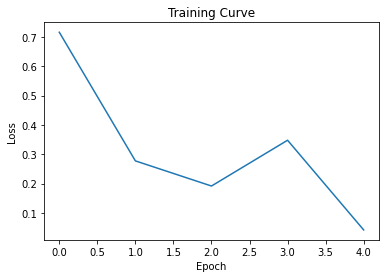

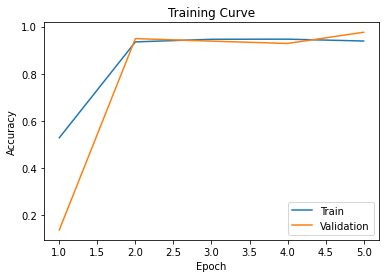

In [ ]:
RNN_2 = RNN_model(len(text_field.vocab.itos), len(text_field.vocab.itos),  num_classes = 2, num_layers = 2)
train_rnn_network(RNN_2, train_iter, valid_iter, num_epochs=5, learning_rate=1e-4)

For epoch = 5, we have vaidation accuracy 0.975785, which is the highest. Since here we have more layers in the GRU model, the number of weights in the neural network will increase as well. Now I will increase the number of epoches from 5 to 10.

2. Increase the number of epoches from 5 to 10.

Epoch 1; Loss 0.065715; Train Acc 0.960550; Val Acc 0.974888
Epoch 2; Loss 0.031585; Train Acc 0.967261; Val Acc 0.968610
Epoch 3; Loss 0.022692; Train Acc 0.963333; Val Acc 0.944395
Epoch 4; Loss 0.032456; Train Acc 0.962023; Val Acc 0.977578
Epoch 5; Loss 0.026133; Train Acc 0.971845; Val Acc 0.971300
Epoch 6; Loss 0.053165; Train Acc 0.972991; Val Acc 0.962332
Epoch 7; Loss 0.028230; Train Acc 0.976265; Val Acc 0.961435
Epoch 8; Loss 0.163561; Train Acc 0.978884; Val Acc 0.961435
Epoch 9; Loss 0.021878; Train Acc 0.980848; Val Acc 0.967713
Epoch 10; Loss 0.005780; Train Acc 0.975610; Val Acc 0.955157


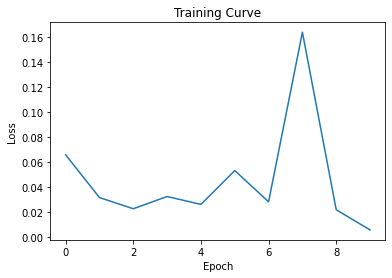

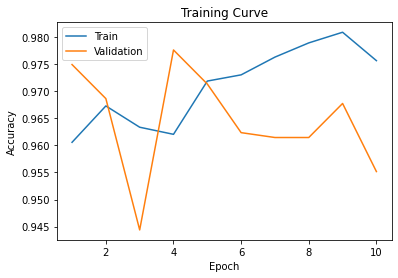

In [ ]:
train_rnn_network(RNN_2, train_iter, valid_iter, num_epochs=10, learning_rate=1e-4)

Here we have `Epoch 4; Loss 0.032456; Train Acc 0.962023; Val Acc 0.977578`.

3. Concatenate the max-pooling and average-pooling of the RNN outputs and keep other unchanged.


Now I would like to change the input of fully-connected layer to see if the performance would be better. I will train with new class called `RNN_new` and keep all the other parameters unchanged.

In [ ]:
#concatenate the max-pooling and average-pooling of the RNN outputs
class RNN_new(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_layers):

        super(RNN_new, self).__init__()

        self.ident = torch.eye(input_size)

        self.hidden_size = hidden_size

        self.rnn = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)

        self.classifier = nn.Linear(2 * hidden_size, num_classes)

    def forward(self, x):
        one_hot = []
        for sms in x:
          one_hot.append(self.ident[sms])

        inp_x = torch.stack(one_hot)

        # Forward propagate the RNN
        output, _ = self.rnn(inp_x)
        #out =  torch.max(output, dim=1)[0]    # max pooling the GRU output
        out = torch.cat([torch.max(output, dim=1)[0], torch.mean(output, dim=1)], dim=1)
        out = self.classifier(out)            # predict SPAM/HAM
        return out

Epoch 1; Loss 0.727383; Train Acc 0.528237; Val Acc 0.138117
Epoch 2; Loss 0.585010; Train Acc 0.924538; Val Acc 0.965919
Epoch 3; Loss 0.018442; Train Acc 0.952202; Val Acc 0.973991
Epoch 4; Loss 0.502864; Train Acc 0.956294; Val Acc 0.969507
Epoch 5; Loss 0.109080; Train Acc 0.959895; Val Acc 0.972197
Epoch 6; Loss 0.240270; Train Acc 0.962187; Val Acc 0.942601
Epoch 7; Loss 0.035504; Train Acc 0.965297; Val Acc 0.975785
Epoch 8; Loss 0.143524; Train Acc 0.964642; Val Acc 0.934529
Epoch 9; Loss 0.062998; Train Acc 0.959568; Val Acc 0.979372
Epoch 10; Loss 0.007469; Train Acc 0.972172; Val Acc 0.975785


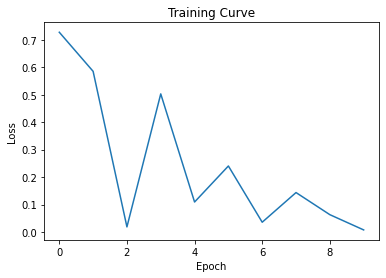

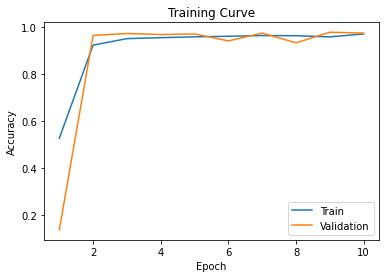

In [ ]:
RNN_3 = RNN_new(len(text_field.vocab.itos), len(text_field.vocab.itos),  num_classes = 2, num_layers = 2)
train_rnn_network(RNN_3, train_iter, valid_iter, num_epochs=10, learning_rate=1e-4)

After training, we have `Epoch 10; Loss 0.007469; Train Acc 0.972172; Val Acc 0.975785`. In our output, I notice that all of the validation accuracies are close, I would like to see if the performance could be better by increasing the learning rate. Next I will change the learning rate to `10e-4`.

Epoch 1; Loss 0.158510; Train Acc 0.963988; Val Acc 0.977578
Epoch 2; Loss 0.065980; Train Acc 0.975773; Val Acc 0.973991
Epoch 3; Loss 0.044873; Train Acc 0.978556; Val Acc 0.975785
Epoch 4; Loss 0.005092; Train Acc 0.980193; Val Acc 0.957848
Epoch 5; Loss 0.009832; Train Acc 0.991161; Val Acc 0.977578
Epoch 6; Loss 0.212813; Train Acc 0.979047; Val Acc 0.955157
Epoch 7; Loss 0.007405; Train Acc 0.988214; Val Acc 0.973094
Epoch 8; Loss 0.125184; Train Acc 0.996071; Val Acc 0.982960
Epoch 9; Loss 0.002684; Train Acc 0.995744; Val Acc 0.982960
Epoch 10; Loss 0.065671; Train Acc 0.990997; Val Acc 0.983857


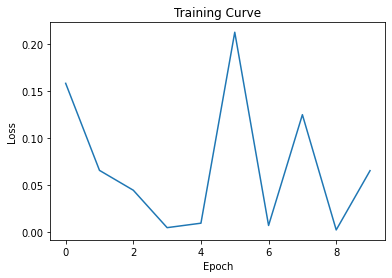

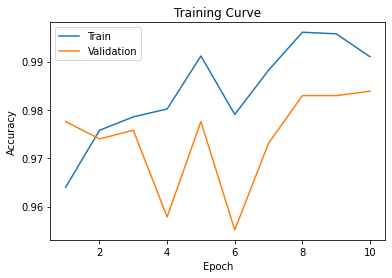

In [ ]:
train_rnn_network(RNN_3, train_iter, valid_iter, num_epochs=10, learning_rate=10e-4)

After increasing the learning rate, we have `Epoch 10; Loss 0.065671; Train Acc 0.990997; Val Acc 0.983857`. The validation accuracy increased and this is the best performance yet. I will choose the `RNN_3`

In [ ]:
torch.save(RNN_3.state_dict(), "/content/selected_model")

### Part (d) [1 pt]

Before we deploy a machine learning model, we usually want to have a better understanding
of how our model performs beyond its validation accuracy. An important metric to track is
*how well our model performs in certain subsets of the data*.

In particular, what is the model's error rate amongst data with negative labels?
This is called the **false positive rate**.

What about the model's error rate amongst data with positive labels?
This is called the **false negative rate**.

Report your final model's false positive and false negative rate across the
validation set.

In [ ]:
# Create a Dataset of only spam validation examples
valid_spam = torchtext.legacy.data.Dataset(
    [e for e in valid.examples if e.label == 1],
    valid.fields)

# Create a Dataset of only non-spam validation examples
valid_nonspam = torchtext.legacy.data.Dataset(
    [e for e in valid.examples if e.label == 0],
    valid.fields)

In [ ]:
valid_spam_iter = torchtext.legacy.data.BucketIterator(valid_spam,
                                           batch_size=32,
                                           sort_key=lambda x: len(x.sms), # to minimize padding
                                           sort_within_batch=True,        # sort within each batch
                                           repeat=False)                  # repeat the iterator for many epochs

valid_nospam_iter = torchtext.legacy.data.BucketIterator(valid_nonspam,
                                           batch_size=32,
                                           sort_key=lambda x: len(x.sms), # to minimize padding
                                           sort_within_batch=True,        # sort within each batch
                                           repeat=False)                  # repeat the iterator for many epochs

In [ ]:
selected_model = RNN_new(len(text_field.vocab.itos), len(text_field.vocab.itos), num_classes = 2, num_layers=2)
state = torch.load("selected_model")
selected_model.load_state_dict(state)

<All keys matched successfully>

In [ ]:
fp = 1 - get_accuracy(selected_model, valid_nospam_iter)
fn = 1 - get_accuracy(selected_model, valid_spam_iter)

In [ ]:
print("The model's false positive rate is {}.".format(fp))

The model's false positive rate is 0.07284079084287198.


In [ ]:
print("The model's false negative rate is {}.".format(fn))

The model's false negative rate is 0.045454545454545414.


### Part (e) [1 pt]

The impact of a false positive vs a false negative can be drastically different.
If our spam detection algorithm was deployed on your phone, what is the impact
of a false positive on the phone's user? What is the impact of a false negative?

False positive is the algorithm classifies the nonspam message as spam. This will make the phone's user cannot receive some important message.

On the other hand, a false negative would mean that the algorithm classifies spam message as non-spam. The user need to take time to delete these mis-classified spam message.

## Part 4. Evaluation [7 pt]

### Part (a) [1 pt]

Report the final test accuracy of your model.

In [ ]:
print("The final test accuracy of my model is {}.".format(get_accuracy(selected_model, test_iter)))

The final test accuracy of my model is 0.933572710951526.


### Part (b) [1 pt]

Report the false positive rate and false negative rate of your model across the test set.

In [ ]:
# Create a Dataset of only spam testing examples
test_spam = torchtext.legacy.data.Dataset(
    [e for e in test.examples if e.label == 1],
    test.fields)


# Create a Dataset of only non-spam testing examples
test_nonspam = torchtext.legacy.data.Dataset(
    [e for e in test.examples if e.label == 0],
    test.fields)


In [ ]:
test_spam_iter = torchtext.legacy.data.BucketIterator(test_spam,
                                           batch_size=32,
                                           sort_key=lambda x: len(x.sms), # to minimize padding
                                           sort_within_batch=True,        # sort within each batch
                                           repeat=False)                  # repeat the iterator for many epochs


test_nonspam_iter = torchtext.legacy.data.BucketIterator(test_nonspam,
                                           batch_size=32,
                                           sort_key=lambda x: len(x.sms), # to minimize padding
                                           sort_within_batch=True,        # sort within each batch
                                           repeat=False)                  # repeat the iterator for many epochs

In [ ]:
fp = 1 - get_accuracy(selected_model, test_nonspam_iter)
fn = 1 - get_accuracy(selected_model, test_spam_iter)

In [ ]:
print("The model's false positive rate is {}.".format(fp))

print("The model's false negative rate is {}.".format(fn))

The model's false positive rate is 0.07230142566191444.
The model's false negative rate is 0.05303030303030298.


### Part (c) [3 pt]

What is your model's prediction of the **probability** that
the SMS message "machine learning is sooo cool!" is spam?

Hint: To begin, use `text_field.vocab.stoi` to look up the index
of each character in the vocabulary.

In [ ]:
msg = "machine learning is sooo cool!"
token = []

for char in msg:
  token.append(torch.tensor(text_field.vocab.stoi[char]))

x = torch.stack(token)
x.unsqueeze_(0)

print("The probability that the SMS message is spam is {}.".format(F.softmax(selected_model(x), dim=1)[0][1].item()))

The probability that the SMS message is spam is 0.08055759966373444.


### Part (d) [2 pt]

Do you think detecting spam is an easy or difficult task?

Since machine learning models are expensive to train and deploy, it is very
important to compare our models against baseline models: a simple
model that is easy to build and inexpensive to run that we can compare our
recurrent neural network model against.

Explain how you might build a simple baseline model. This baseline model
can be a simple neural network (with very few weights), a hand-written algorithm,
or any other strategy that is easy to build and test.

**Do not actually build a baseline model. Instead, provide instructions on
how to build it.**

I would like to build a simple baseline model using Bayes' Rule. The model correlates the use of some words with spam and non-spam message, then use Bayes' theorem to calculate the probability that the message is a spam message.

For example, in spam message, price is often used. In our model, we could choose price as one of our tokens and calculate the probability it appears in the message to identify if the message is spam.

# PART B - Transfer Learning [20 pt]

In this part we will compare our earlier model with one that takes advantage of a generative RNN model to improve the prediction. There are several ways to implement transfer learning with RNNs, here we will use an approach known as ULMFiT developed by fastai. Rather than rebuilding the model from scratch, we will take advantage of the fastai library.

Provided below is some helper code to get you started.

#### Helper Code

In [ ]:
# install relevant libraries
!pip install spacy==2.3.5
!pip install fastai==1.0.61
# load relevant libraries
from fastai import *
import pandas as pd
import numpy as np
from functools import partial
import io
import os
from fastai.text import *

In [ ]:
# download SPAM data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
!unzip smsspamcollection.zip

This time we will load the data using pandas.

In [ ]:
# set up data and verify
df1 = pd.read_csv('SMSSpamCollection', sep='\t',  header=None, names=['target', 'text'])
df1.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# check distribution
df1['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

Split the data into training and validation datasets.

In [ ]:
# split the data and check dimensions

from sklearn.model_selection import train_test_split

# split data into training and validation set
df_trn, df_val = train_test_split(df1, stratify = df1['target'], test_size = 0.3, random_state = 999)

In [ ]:
df_trn.shape, df_val.shape

((3900, 2), (1672, 2))

### Create the language model
Esentially, the language model contains the structure of the language (English in this case), allowing us to quickly use in a classification model, skipping the part of learning the semantics of the language from scratch.

Creating a language model from scratch can be intensive due to the sheer size of data. Instead we will download the pre-trained model, which is a neural network (NN) with an AWD_LSTM architecture. By setting pretrained = True we say to fastai to download the weights from the trained model (a corpus of 103 MM of wikipedia articles).

In [ ]:
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

lang_mod = language_model_learner(data_lm, arch = AWD_LSTM, pretrained = True, drop_mult=1.)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


### Testing the language model


In [ ]:
for i in range(5):
  print(lang_mod.predict("The problem usually starts when", n_words=10))

The problem usually starts when a man is having a problem ; he starts to
The problem usually starts when the wrong character is in the rooms of another room
The problem usually starts when the brain completely dry down or is lost or closed
The problem usually starts when the rhythm of the team is over under you .
The problem usually starts when it is being re - followed , only when the


Each time we excecute the `predict`, we get a different random sentence, completed with the number of choosen words (`n_words`).

Try your own sentences!

### Fine-tuning the language model
The language model that we have "loaded" is great for generating wikipedia-like sentances, but here we're more interested in generating data like our email dataset.

Make sure to enable GPU for this step or it make takes several hours to train.

In [ ]:
# fine-tune language model data
lang_mod.fit_one_cycle(4, max_lr= 5e-02)
lang_mod.freeze_to(-1)
lang_mod.fit_one_cycle(3, slice(1e-2/(2.6**4), 1e-2))
lang_mod.freeze_to(-2)
lang_mod.fit_one_cycle(3, slice(3e-3/(2.6**4), 1e-3))
lang_mod.unfreeze()
lang_mod.fit_one_cycle(3, slice(3e-3/(2.6**4), 1e-3))

# save language model
lang_mod.save_encoder('my_awsome_encoder')

epoch,train_loss,valid_loss,accuracy,time
0,5.583185,3.810221,0.314286,00:03
1,4.840135,3.904084,0.242857,00:02
2,4.385042,3.831027,0.285714,00:02
3,4.072360,3.820574,0.285714,00:02


epoch,train_loss,valid_loss,accuracy,time
0,3.578123,3.740409,0.257143,00:02
1,3.541867,3.787033,0.257143,00:02
2,3.483867,3.783769,0.257143,00:02


epoch,train_loss,valid_loss,accuracy,time
0,3.394516,3.797193,0.257143,00:02
1,3.375975,3.772872,0.257143,00:02
2,3.362005,3.773418,0.257143,00:02


epoch,train_loss,valid_loss,accuracy,time
0,3.317837,3.769932,0.242857,00:03
1,3.293936,3.793487,0.228571,00:03
2,3.257838,3.771422,0.242857,00:03


### Classification model
Now we can train a classification model that will identify spam and non-spam messages. Since we used a fastai language model, it will be easier to just continue working with the fastai library.

In [ ]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn,  valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
data_clas.show_batch()

text,target
"xxbos xxmaj the last thing i ever wanted to do was hurt you . xxmaj and i did n't think it would have . xxmaj you 'd laugh , be embarassed , delete the xxunk and keep going . xxmaj but as far as i knew , it was n't even up . xxmaj the fact that you even felt like i would do it to hurt you shows you",ham
"xxbos xxmaj sad story of a xxmaj man - xxmaj last week was my b'day . xxmaj my xxmaj wife did'nt wish me . xxmaj my xxmaj parents forgot n so did my xxmaj kids . i went to work . xxmaj even my xxmaj colleagues did not wish . xxmaj as i entered my cabin my xxup pa said , '' xxmaj happy xxmaj b'day xxmaj boss ! !",ham
"xxbos xxmaj sad story of a xxmaj man - xxmaj last week was my b'day . xxmaj my xxmaj wife did'nt wish me . xxmaj my xxmaj parents forgot n so did my xxmaj kids . i went to work . xxmaj even my xxmaj colleagues did not wish . xxmaj as i entered my cabin my xxup pa said , '' xxmaj happy xxmaj b'day xxmaj boss ! !",ham
xxbos xxmaj for me the love should start with xxunk should feel that i need her every time around xxunk should be the first thing which comes in my thoughts . i would start the day and end it with xxunk should be there every time i xxunk will be then when my every breath has her xxunk life should happen around xxunk life will be named to her .,ham
"xxbos xxmaj solve d xxmaj case : a xxmaj man xxmaj was xxmaj found xxmaj murdered xxmaj on < xxup decimal > . < # > afternoon . 1,his wife called xxmaj police . 2,police questioned everyone . 3,wife : xxmaj sir , i was sleeping , when the murder took place . 4.cook : i was cooking . 5.gardener : i was picking vegetables . 6.house - xxmaj maid",ham


In [ ]:
# create the classifier
learn_classifier = text_classifier_learner(data_clas, drop_mult=0.7, arch = AWD_LSTM)

In [ ]:
# load language model
learn_classifier.load_encoder('my_awsome_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (3900 items)
x: TextList
xxbos i liked your new house,xxbos xxmaj xxunk i 'm walking in xxunk now ü faster come down ... xxmaj me very hungry ...,xxbos xxmaj wan2 win a meet+greet with xxmaj westlife 4 u or a m8 ? xxmaj they are currently on what tour ? 1)unbreakable , 2)untamed , 3)unkempt . xxmaj text 1,2 or 3 to 83049 . xxmaj cost 50p + std text,xxbos xxmaj otherwise had part time job na - tuition ..,xxbos xxmaj wait , do you know if xxunk in town ? i bet she does hella drugs !
y: CategoryList
ham,ham,spam,ham,ham
Path: .;

Valid: LabelList (1672 items)
x: TextList
xxbos xxmaj not a lot has happened here . xxmaj feels very xxunk . xxmaj xxunk is at her xxunk and xxunk is working lots . xxmaj just me and xxunk in at the mo . xxmaj how have you been ?,xxbos xxmaj the current xxunk bid is xxunk . xxmaj to xxunk this auction send xxup out . xxmaj customer xxmaj care : xxunk,xxbos xxmaj are you free xxunk i call now ?,xxbos xxmaj cold 

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-01
Min loss divided by 10: 7.59E-02


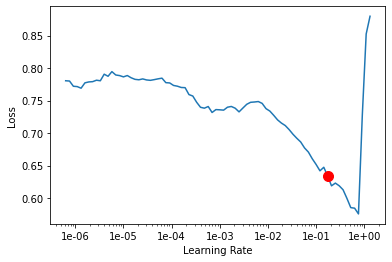

In [ ]:
# train classifier
learn_classifier.lr_find()
learn_classifier.recorder.plot(suggestion=True)

In [ ]:
learn_classifier.fit_one_cycle(5, max_lr=1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.419469,0.076173,0.978469,00:03
1,0.193486,0.095081,0.976077,00:03
2,0.113412,0.079303,0.985646,00:03
3,0.097535,0.071120,0.984450,00:03
4,0.083991,0.086999,0.980861,00:03


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

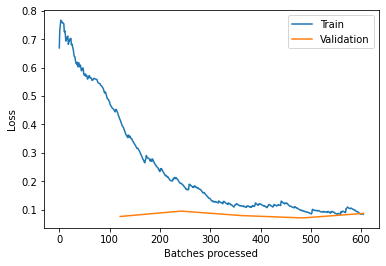

In [ ]:
learn_classifier.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06
Min loss divided by 10: 1.10E-05


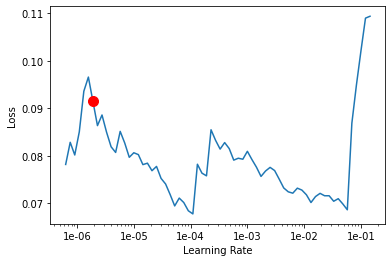

In [ ]:
lang_mod.freeze_to(-1)

learn_classifier.lr_find()
learn_classifier.recorder.plot(suggestion=True)

Test out the classification model on spam and non-spam examples.

In [ ]:
# predict
learn_classifier.predict('did you buy the groceries for dinner? :)')

(Category tensor(1), tensor(1), tensor([0.4936, 0.5064]))

In [ ]:
# predict
learn_classifier.predict('Free entry call back now')

(Category tensor(1), tensor(1), tensor([0.4962, 0.5038]))

Next we will evaluate on all of our validation data.

In [ ]:
# get predictions from validation
valid_preds, valid_label=learn_classifier.get_preds(ds_type=DatasetType.Valid, ordered=True)
valid_preds.shape

torch.Size([1672, 2])

## Part 1. Evaluate Performance [10pt]

### Part (a) [5pt]

Implement the above helper code for spam detection.

What is the accuracy obtained with ULMFiT? How does ULMFiT compare to the approach in the first part using only LSTM?

In [ ]:
preds=valid_preds.numpy()
print(np.mean(preds[:,0])) #ham
print(np.mean(preds[:,1])) #spam

0.88910216
0.1108978


Here in order to be conservative, and reduce the false positive rate, we set the threshold value for the SPAM category will be 0.05.

In [ ]:
val_target=preds[:,1]>0.05
val_target = np.where(val_target == False, "ham", "spam")

In [ ]:
df_val_pred=pd.DataFrame({'text':df_val.text, 'target':df_val.target, 'pred_target':val_target, 'spam_score': preds[:,1]})

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df_val_pred.target, df_val_pred.pred_target)

0.972488038277512

In [ ]:
#accuracy for model using LSTM
get_accuracy(RNN_3, valid_iter)

0.967713004484305

In the first part, the model using only LSTM has validation accuracy 0.9677, which is lower than the model with ULMFiT (acc = 0.9725).

### Part (b) [5pt]
Provide a confusion matrix of the performance for the two models. How do they compare? Are there any qualitative differences between the performances (i.e. examine the samples for which the models differred)?

First, get the confusion matrix for model with ULMFiT.

In [ ]:
#confusion matrix for model with ULMFiT
pd.crosstab(df_val_pred.target, df_val_pred.pred_target)

pred_target,ham,spam
target,,
ham,1407,41
spam,5,219


Now, get the confusion matrix for model with LSTM.

In [ ]:
def get_predict_label(model, data_loader):

    predict_list = []
    label_list = []

    for sms, labels in data_loader:
        output = model(sms[0])
        pred = output.max(1, keepdim=True)[1] # make classification

        predict_list.append(pred)
        label_list.append(labels)

    return predict_list, label_list

In [ ]:
predict_list, label_list = get_predict_label(RNN_3, valid_iter)

In [ ]:
get_accuracy(RNN_3, valid_iter)

0.967713004484305

In [ ]:
for i in range(len(predict_list)):
    predict_list[i] = predict_list[i].numpy()
    predict_list[i] = predict_list[i].squeeze()

In [ ]:
predict_list = [arr.tolist() for arr in predict_list]

In [ ]:
import itertools
flat_predict_list = list(itertools.chain(*predict_list))

In [ ]:
for i in range(len(label_list)):
    label_list[i] = label_list[i].numpy()
    label_list[i] = label_list[i].squeeze()

In [ ]:
label_list = [arr.tolist() for arr in label_list]

flat_label_list = list(itertools.chain(*label_list))

In [ ]:
bool_list = []

for n in range(len(flat_label_list)):
  if flat_label_list[n] == 1:
    bool_list.append('spam')
  else:
    bool_list.append('ham')

In [ ]:
target = []

for n in range(len(flat_label_list)):
  if flat_label_list[n] == 1:
    target.append('spam')
  else:
    target.append('ham')

In [ ]:
df_val_pred=pd.DataFrame({'target':target, 'pred_target':bool_list})

In [ ]:
#confusion matrix for model with LSTM
pd.crosstab(df_val_pred.target, df_val_pred.pred_target)

pred_target,ham,spam
target,,
ham,862,109
spam,109,35


In [ ]:
acc_lstm_ham = 862/(862+109)
acc_lstm_spam = 35/(109+35)
acc_ulmfit_ham = 1407/(1407+41)
acc_ulmfit_spam = 219/(219+5)

In [ ]:
print(acc_lstm_ham)
print(acc_lstm_spam)
print(acc_ulmfit_ham)
print(acc_ulmfit_spam)

0.8877445932028837
0.24305555555555555
0.9716850828729282
0.9776785714285714


1. confusion matrix comparison

For model using LSTM, for ham message, it predicts 862 samples correctly; for spam message, it predicts 35 samples correctly.

For model using ULMFiT, for ham message, it predicts 1407 samples correctly; for spam message, it predicts 219 samples correctly.



2. difference in performance

For model using LSTM, for ham message, the prediction accuracy is 0.8877; for spam message the prediction accuracy is 0.2430.

For model using ULMFiT, for ham message, the prediction accuracy is 0.9716; for spam message the prediction accuracy is 0.9776.

In part B the dataset is split into 0.7 training set and 0.3 validation set, whereas in part A dataset is split into 0.6 training set, 0.2 validation set, and 0.2 test set. The difference in data splitting may cause the difference in performance as well.

## Part 2. Evaluate on New Data [10pt]

### Part (a) [4pt]
What is your model's prediction of the probability that the SMS message "machine learning is sooo cool!" is spam?

In [ ]:
learn_classifier.predict('machine learning is sooo cool!')

(Category tensor(1), tensor(1), tensor([0.4978, 0.5022]))

From the output above, the probability that the SMS message "machine learning is soooo cool!" is spam is 0.5022.

### Part (b) [3 pt]
Load 5 sample sentences from your spam mail and test it out out the two models you created. How well do they perform?

In [ ]:
spam = df1[df1["target"] == "spam"].iloc[:5]

In [ ]:
spam_text =spam["text"]
spam_text

2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: text, dtype: object

1. Perform on model with ULMFiT

In [ ]:
spam['pred'] = spam_text.apply(lambda row:str(learn_classifier.predict(row)[0]))

In [ ]:
spam

,target,text,pred
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,spam
5,spam,FreeMsg Hey there darling it's been 3 week's n...,ham
8,spam,WINNER!! As a valued network customer you have...,spam
9,spam,Had your mobile 11 months or more? U R entitle...,spam
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",spam


From the output above, the model predicts one sample incorrect, four samples correct.

2. Perform on model with LSTM.

In [ ]:
def predict_model_LSTM(msg):

  token = []

  for char in msg:
    token.append(torch.tensor(text_field.vocab.stoi[char]))

  x = torch.stack(token)
  x.unsqueeze_(0)

  print("The probability that the SMS message is spam is {}.".format(F.softmax(selected_model(x), dim=1)[0][1].item()))

In [ ]:
msg1 = spam_text.values[0]
msg2 = spam_text.values[1]
msg3 = spam_text.values[2]
msg4 = spam_text.values[3]
msg5 = spam_text.values[4]

In [ ]:
predict_model_LSTM(msg1)

The probability that the SMS message is spam is 0.9997290968894958.


In [ ]:
predict_model_LSTM(msg2)

The probability that the SMS message is spam is 0.9785522818565369.


In [ ]:
predict_model_LSTM(msg3)

The probability that the SMS message is spam is 0.9986242055892944.


In [ ]:
predict_model_LSTM(msg4)

The probability that the SMS message is spam is 0.9961537718772888.


In [ ]:
predict_model_LSTM(msg5)

The probability that the SMS message is spam is 0.9995549321174622.


### Part (c) [3pt]
Load 5 sample sentences from your regular mail and test it out out the two models you created. How well do they perform?

In [ ]:
ham = df1[df1["target"] == "ham"].iloc[:5]

In [ ]:
ham_text =ham["text"]
ham_text

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: text, dtype: object

1. Perform on model with ULMFiT

In [ ]:
ham['pred'] = ham_text.apply(lambda row:str(learn_classifier.predict(row)[0]))

In [ ]:
ham

,target,text,pred
0,ham,"Go until jurong point, crazy.. Available only ...",ham
1,ham,Ok lar... Joking wif u oni...,ham
3,ham,U dun say so early hor... U c already then say...,ham
4,ham,"Nah I don't think he goes to usf, he lives aro...",ham
6,ham,Even my brother is not like to speak with me. ...,ham


From the output above, the model predicts all samples correct.

2. Perform on model with LSTM

In [ ]:
hmsg1 = ham_text.values[0]
hmsg2 = ham_text.values[1]
hmsg3 = ham_text.values[2]
hmsg4 = ham_text.values[3]
hmsg5 = ham_text.values[4]

In [ ]:
predict_model_LSTM(hmsg1)

The probability that the SMS message is spam is 0.10706359893083572.


In [ ]:
predict_model_LSTM(hmsg2)

The probability that the SMS message is spam is 0.012286166660487652.


In [ ]:
predict_model_LSTM(hmsg3)

The probability that the SMS message is spam is 0.010687394067645073.


In [ ]:
predict_model_LSTM(hmsg4)

The probability that the SMS message is spam is 0.008097654208540916.


In [ ]:
predict_model_LSTM(hmsg5)

The probability that the SMS message is spam is 0.11487415432929993.


### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html /content/LAB_4_Sequential_Data.ipynb

[NbConvertApp] Converting notebook /content/LAB_4_Sequential_Data.ipynb to html
/usr/local/lib/python3.7/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  mimetypes=output.keys())
[NbConvertApp] Writing 745237 bytes to /content/LAB_4_Sequential_Data.html


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus